In [2]:
#setting up
import xgboost as xgb #calls script to build xgboost path variables for windows on my machine

#libraries used
#import xgboost as xgb #modeling
import pandas as pd #dataframe manipulation
import numpy as np  #n-arrays
from sklearn.metrics import accuracy_score #scoring
import matplotlib as mpl
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt #plotting graphs
import seaborn as sns  #for better looking graphs

%matplotlib inline

np.random.seed(0) #For repeatability of the experiment



# Importing Data Set

In [4]:
#Read the data set
df1= pd.read_csv('ABC_dataset.csv', delimiter=",", header=0)
df1.shape
display(df1.head(5))

,Unnamed: 0,customer_id,rcpt_domain_legacy_isp,rcpt_domain_other,total_injection_count,total_injection_count_tracked,complaint_count,trap_count,open_count,admin_csl_bounce,...,hard_bounce_percent,mailbox_full_bounce_percent,other_bounce_percent,smart_send_suppression_bounce_percent,soft_bounce_percent,timeout_bounce_percent,too_large_bounce_percent,transient_failure_bounce_percent,undetermined_bounce_percent,terminated
0,0,0,340.0,11557.0,11897,0,1.0,4.0,NaN,738.0,...,0.000925,0.005632,0.0,0,0.0,0.000336,0.0,0.0,0.000084,False
1,1,1,NaN,2230977.0,2230977,0,NaN,NaN,NaN,NaN,...,0.000038,0.000000,0.0,0,0.0,0.000000,0.0,0.0,0.001564,False
2,2,2,733.0,29865.0,30598,0,NaN,1.0,NaN,4419.0,...,0.000131,0.000000,0.0,0,0.0,0.001896,0.0,0.0,0.002451,False
3,3,3,NaN,21120.0,21120,53,1.0,3.0,12.0,484.0,...,0.001420,0.000142,0.0,0,0.0,0.019744,0.0,0.0,0.000189,False
4,4,4,NaN,1766.0,1766,1766,NaN,NaN,20.0,NaN,...,0.000000,0.000000,0.0,0,0.0,0.000000,0.0,0.0,0.000000,False


# Data Exploration

In [5]:
#Excluding the percent columns from the dataframe
df=pd.concat([df1.iloc[:,1:24],df1.iloc[:,-1]],axis = 1)

#Setting Customer_ID as index
df.set_index("customer_id", inplace=True)

#view the data
display(df.head(5))


,rcpt_domain_legacy_isp,rcpt_domain_other,total_injection_count,total_injection_count_tracked,complaint_count,trap_count,open_count,admin_csl_bounce,admin_gsl_bounce,admin_other_bounce,...,hard_bounce,mailbox_full_bounce,other_bounce,smart_send_suppression_bounce,soft_bounce,timeout_bounce,too_large_bounce,transient_failure_bounce,undetermined_bounce,terminated
customer_id,,,,,,,,,,,,,,,,,,,,,
0,340.0,11557.0,11897,0,1.0,4.0,NaN,738.0,6.0,NaN,...,11.0,67.0,NaN,NaN,NaN,4.0,NaN,NaN,1.0,False
1,NaN,2230977.0,2230977,0,NaN,NaN,NaN,NaN,NaN,NaN,...,84.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3490.0,False
2,733.0,29865.0,30598,0,NaN,1.0,NaN,4419.0,44.0,NaN,...,4.0,NaN,NaN,NaN,NaN,58.0,NaN,NaN,75.0,False
3,NaN,21120.0,21120,53,1.0,3.0,12.0,484.0,51.0,NaN,...,30.0,3.0,NaN,NaN,NaN,417.0,NaN,NaN,4.0,False
4,NaN,1766.0,1766,1766,NaN,NaN,20.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


In [6]:
## Checking the type of columns to make sure all the columns have correct data types for further data operations.
print(df.dtypes)

rcpt_domain_legacy_isp           float64
rcpt_domain_other                float64
total_injection_count              int64
total_injection_count_tracked      int64
complaint_count                  float64
trap_count                       float64
open_count                       float64
admin_csl_bounce                 float64
admin_gsl_bounce                 float64
admin_other_bounce               float64
block_bounce                     float64
dns_failure_bounce               float64
generic_bounce                   float64
hard_bounce                      float64
mailbox_full_bounce              float64
other_bounce                     float64
smart_send_suppression_bounce    float64
soft_bounce                      float64
timeout_bounce                   float64
too_large_bounce                 float64
transient_failure_bounce         float64
undetermined_bounce              float64
terminated                          bool
dtype: object


In [7]:
## Checking distribution of terminated-unterminated records. 
#Creating dataframe of terminated records
Terminated_True = df.loc[df["terminated"] == True]
print(Terminated_True.shape)

#Creating dataframe of unterminated records
Terminated_False = df.loc[df["terminated"] == False]
print(Terminated_False.shape)

(10352, 23)
(10976, 23)


The data is not imbalanced i.e. both the classes are represented equally.

In [8]:
#Checking the summary of data
df.describe(include = 'all')

,rcpt_domain_legacy_isp,rcpt_domain_other,total_injection_count,total_injection_count_tracked,complaint_count,trap_count,open_count,admin_csl_bounce,admin_gsl_bounce,admin_other_bounce,...,hard_bounce,mailbox_full_bounce,other_bounce,smart_send_suppression_bounce,soft_bounce,timeout_bounce,too_large_bounce,transient_failure_bounce,undetermined_bounce,terminated
count,1.323700e+04,2.129800e+04,2.132800e+04,2.132800e+04,10783.000000,11285.000000,9.157000e+03,9.132000e+03,7479.000000,3045.000000,...,1.939700e+04,1.204600e+04,1027.000000,0.0,9.610000e+02,1.070200e+04,1131.000000,7551.000000,1.453000e+04,21328
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10976
mean,5.587141e+04,2.032987e+05,2.376888e+05,1.569269e+05,244.456459,358.277005,1.037830e+05,7.724493e+03,541.109774,54.415764,...,2.259396e+03,4.100579e+02,16.785784,NaN,1.769298e+03,8.351240e+03,25.524315,941.092173,1.578689e+03,NaN
std,5.078922e+05,3.898411e+06,4.065952e+06,4.027716e+06,2466.215724,4455.856971,1.453332e+06,1.220423e+05,4625.815603,520.363632,...,1.622206e+04,1.043858e+04,261.652115,NaN,3.303298e+04,1.511610e+05,124.653020,16344.470934,1.919643e+04,NaN
min,1.000000e+00,1.000000e+00,1.000000e+03,0.000000e+00,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000,1.000000,...,1.000000e+00,1.000000e+00,1.000000,NaN,1.000000e+00,1.000000e+00,1.000000,1.000000,1.000000e+00,NaN
25%,1.400000e+01,2.785500e+03,3.597250e+03,0.000000e+00,2.000000,4.000000,4.220000e+02,2.300000e+01,5.000000,2.000000,...,1.200000e+01,3.000000e+00,1.000000,NaN,1.000000e+00,6.000000e+00,1.000000,2.000000,6.000000e+00,NaN
50%,1.160000e+02,8.809500e+03,1.000000e+04,0.000000e+00,7.000000,15.000000,2.058000e+03,1.450000e+02,18.000000,5.000000,...,8.100000e+01,1.200000e+01,2.000000,NaN,2.000000e+00,3.600000e+01,3.000000,5.000000,3.500000e+01,NaN
75%,1.250000e+03,3.687975e+04,4.089775e+04,1.540250e+03,29.000000,74.000000,9.962000e+03,1.044250e+03,102.000000,18.000000,...,5.390000e+02,5.900000e+01,4.000000,NaN,5.000000e+00,3.197500e+02,9.000000,24.000000,2.300000e+02,NaN


Removing smart_send_suppression_bounce since all the values in this column are null and therefore, not revealing any information. 


In [9]:
#Dropping smart_send_suppression_bounce
df = df.drop(['smart_send_suppression_bounce'], axis = 1)

In [10]:
## Cross checking the dataframe attributes
print(df.columns.unique())

Index(['rcpt_domain_legacy_isp', 'rcpt_domain_other', 'total_injection_count',
       'total_injection_count_tracked', 'complaint_count', 'trap_count',
       'open_count', 'admin_csl_bounce', 'admin_gsl_bounce',
       'admin_other_bounce', 'block_bounce', 'dns_failure_bounce',
       'generic_bounce', 'hard_bounce', 'mailbox_full_bounce', 'other_bounce',
       'soft_bounce', 'timeout_bounce', 'too_large_bounce',
       'transient_failure_bounce', 'undetermined_bounce', 'terminated'],
      dtype='object')


In [11]:
#checking Correlation 
corr = df.corr()
corr.style.background_gradient().set_precision(2)


,rcpt_domain_legacy_isp,rcpt_domain_other,total_injection_count,total_injection_count_tracked,complaint_count,trap_count,open_count,admin_csl_bounce,admin_gsl_bounce,admin_other_bounce,block_bounce,dns_failure_bounce,generic_bounce,hard_bounce,mailbox_full_bounce,other_bounce,soft_bounce,timeout_bounce,too_large_bounce,transient_failure_bounce,undetermined_bounce,terminated
rcpt_domain_legacy_isp,1,0.38,0.46,0.41,0.81,0.47,0.3,0.071,0.24,0.25,0.55,0.055,0.15,0.6,0.13,0.92,0.91,0.35,0.16,0.26,0.21,0.067
rcpt_domain_other,0.38,1,1,0.99,0.48,0.53,0.87,0.2,0.48,0.19,0.38,0.083,0.24,0.31,0.34,0.31,0.34,0.27,0.33,0.17,0.21,-0.03
total_injection_count,0.46,1,1,0.99,0.54,0.55,0.86,0.2,0.48,0.2,0.42,0.084,0.24,0.36,0.34,0.36,0.38,0.29,0.32,0.18,0.22,-0.023
total_injection_count_tracked,0.41,0.99,0.99,1,0.51,0.51,0.86,0.19,0.48,0.18,0.39,0.048,0.21,0.33,0.34,0.35,0.38,0.26,0.32,0.17,0.16,-0.035
complaint_count,0.81,0.48,0.54,0.51,1,0.59,0.41,0.054,0.32,0.23,0.61,0.049,0.23,0.66,0.15,0.89,0.88,0.4,0.16,0.22,0.18,0.041
trap_count,0.47,0.53,0.55,0.51,0.59,1,0.42,0.3,0.38,0.51,0.75,0.32,0.53,0.51,0.18,0.72,0.69,0.38,0.16,0.17,0.59,-0.015
open_count,0.3,0.87,0.86,0.86,0.41,0.42,1,0.13,0.42,0.12,0.2,0.048,0.23,0.26,0.28,0.19,0.24,0.15,0.37,0.084,0.14,-0.041
admin_csl_bounce,0.071,0.2,0.2,0.19,0.054,0.3,0.13,1,0.31,0.86,0.26,0.34,0.39,0.24,0.18,0.012,0.048,0.26,0.11,0.27,0.56,-0.011
admin_gsl_bounce,0.24,0.48,0.48,0.48,0.32,0.38,0.42,0.31,1,0.13,0.31,0.39,0.4,0.34,0.44,0.23,0.18,0.31,0.19,0.25,0.38,-0.028
admin_other_bounce,0.25,0.19,0.2,0.18,0.23,0.51,0.12,0.86,0.13,1,0.39,0.17,0.4,0.22,0.054,0.27,0.29,0.17,0.048,0.067,0.46,-0.0098


Since many variables are colinear Logistic Regression approach was discarded. All variables are numerical and have missing values, therefore XGBoost tree would be a good fit for the classifier as boosted tree can handle missing values.So there's no need to transform any variable or impute missing values. Although XGBoost can handle corrleated variables some of highly correlated variables were dropped. 

In [12]:
df = df.drop(['total_injection_count_tracked','total_injection_count','other_bounce','soft_bounce'], axis = 1)


Data Model Preparation

In [13]:
#Splitting data into train and test data sets as 75:25.
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size=0.25)


In [14]:
#building and tuning the Xgboost model
from sklearn.metrics import confusion_matrix

#Creating the DMatrix from the training data set
xgtrain = xgb.DMatrix(df_train.iloc[:,:-1], label=df_train['terminated'])

#Setting the hyper-parameters for the model
cv_folds =5 
early_stopping_rounds = 50

In [15]:
#Model 1
#initializing model with intution
xgb1 = xgb.XGBClassifier(
learning_rate =0.01,
n_estimators=100,
max_depth=7,
subsample=0.8,
seed=1)

#inititalize the model for cross validation
xgbmodel1=xgb1

#perform cross validation 
cvresult1 = xgb.cv(xgbmodel1.get_xgb_params(), xgtrain, num_boost_round=xgbmodel1.get_params()['n_estimators'], nfold=cv_folds,
                      metrics = ['error'], early_stopping_rounds=early_stopping_rounds, verbose_eval=False)
xgbmodel1.set_params(n_estimators=cvresult1.shape[0]) 
best_round = cvresult1.shape[0] -1


print(cvresult1.tail())
#print(cvresult)



    train-error-mean  train-error-std  test-error-mean  test-error-std
95          0.135549         0.002872         0.157976        0.005094
96          0.135456         0.002874         0.157851        0.004984
97          0.135346         0.002734         0.157851        0.005077
98          0.135300         0.002571         0.157851        0.004772
99          0.135346         0.002622         0.157476        0.005267


In [16]:
##minimum error in the cross validation results
cvresult1.loc[cvresult1['test-error-std'].idxmin()]

train-error-mean    0.145630
train-error-std     0.001560
test-error-mean     0.161915
test-error-std      0.003498
Name: 17, dtype: float64

In [17]:
#Model2
#Increasing maximum depth and decreasing subsample size in attempt to decrease the error at the same time trying to avoid overfit
xgb2 = xgb.XGBClassifier(
learning_rate =0.01,
n_estimators=100,
max_depth=9,
subsample=0.7,
seed=1)


#inititalize the model for cross validation
xgbmodel2 = xgb2

#perform cross validation 
cvresult2 = xgb.cv(xgbmodel2.get_xgb_params(), xgtrain, num_boost_round=xgbmodel2.get_params()['n_estimators'], nfold=cv_folds,
                      metrics = ['error'], early_stopping_rounds=early_stopping_rounds, verbose_eval=False)
xgbmodel2.set_params(n_estimators=cvresult2.shape[0]) 
best_round = cvresult2.shape[0] -1


print(cvresult2.tail())
#print(cvresult)


    train-error-mean  train-error-std  test-error-mean  test-error-std
95          0.108418         0.003028         0.150537        0.005175
96          0.108339         0.002904         0.150162        0.004702
97          0.108136         0.002838         0.150037        0.004938
98          0.107793         0.002826         0.150037        0.005173
99          0.107542         0.002916         0.149787        0.004796


In [18]:
##minimum error in the cross validation results
cvresult2.loc[cvresult2['test-error-std'].idxmin()]

train-error-mean    0.123562
train-error-std     0.003091
test-error-mean     0.156601
test-error-std      0.003306
Name: 7, dtype: float64

In [60]:
#Model3
#Increasing the depth of the classifier keeping subsample size same.
xgb3 = xgb.XGBClassifier(
learning_rate =0.01,
n_estimators=100,
max_depth=10,
subsample=0.7,
seed=1)

#inititalize the model for cross validation
xgbmodel3=xgb3

#perform cross validation 
cvresult3 = xgb.cv(xgbmodel3.get_xgb_params(), xgtrain, num_boost_round=xgbmodel3.get_params()['n_estimators'], nfold=cv_folds,
                      metrics = ['error'], early_stopping_rounds=early_stopping_rounds, verbose_eval=False)
xgbmodel3.set_params(n_estimators=cvresult3.shape[0]) 
best_round = cvresult3.shape[0] -1


print(cvresult3.tail())
#print(cvresult)



    train-error-mean  train-error-std  test-error-mean  test-error-std
95          0.094993         0.002256         0.146786        0.005688
96          0.094977         0.002225         0.147099        0.005331
97          0.094477         0.002333         0.147474        0.005511
98          0.094273         0.002238         0.146849        0.005684
99          0.094148         0.002231         0.146786        0.005995


In [61]:
##minimum error in the cross validation results
cvresult3.loc[cvresult3['test-error-std'].idxmin()]

train-error-mean    0.113700
train-error-std     0.002997
test-error-mean     0.157977
test-error-std      0.002180
Name: 5, dtype: float64

In [83]:
#Model 4
#initial model
xgb4 = xgb.XGBClassifier(
learning_rate =0.01,
n_estimators=100,
max_depth=8,
subsample=0.7,
seed=1)

#inititalize the model for cross validation
xgbmodel4=xgb4

#perform cross validation 
cvresult4 = xgb.cv(xgbmodel4.get_xgb_params(), xgtrain, num_boost_round=xgbmodel4.get_params()['n_estimators'], nfold=cv_folds,
                      metrics = ['error'], early_stopping_rounds=early_stopping_rounds, verbose_eval=False)
xgbmodel4.set_params(n_estimators=cvresult4.shape[0]) 
best_round = cvresult4.shape[0] -1


print(cvresult4.tail())
#print(cvresult)




    train-error-mean  train-error-std  test-error-mean  test-error-std
95          0.121327         0.002413         0.152913        0.005621
96          0.121171         0.002267         0.153100        0.005267
97          0.121187         0.002268         0.152975        0.005496
98          0.121155         0.002240         0.152913        0.005509
99          0.121140         0.002318         0.153163        0.005243


In [84]:
##minimum error in the cross validation results
cvresult4.loc[cvresult1['test-error-std'].idxmin()]

train-error-mean    0.132674
train-error-std     0.002650
test-error-mean     0.157101
test-error-std      0.003903
Name: 17, dtype: float64

In [19]:
#Evaluating the model 
#Fit the selected model on the training data
fit_model = xgbmodel2.fit(df_train.iloc[:,:-1], df_train['terminated'],eval_metric="error")

#Predict the dependent variable
y_pred = xgbmodel2.predict(df_train.iloc[:,:-1])
class_predictions = [round(value) for value in y_pred] #use default threhold of 0.5

#Print model accuracy
print ( "Train Accuracy : %.4f" % accuracy_score(df_train['terminated'], class_predictions))        

y_pred1 = xgbmodel2.predict(df_test.iloc[:,:-1])
class_predictions1 = [round(value) for value in y_pred1] #use default threhold of 0.5

#Print model accuracy
print ( "Test Accuracy : %.4f" % accuracy_score(df_test['terminated'], class_predictions1))        

C:\Anaconda3.5\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Train Accuracy : 0.8887
Test Accuracy : 0.8577


C:\Anaconda3.5\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [21]:
#Check the confusion matrix
from sklearn.metrics import classification_report
cnf_matrix = confusion_matrix(df_test.iloc[:,-1], y_pred1)
print(cnf_matrix)




[[2191  539]
 [ 220 2382]]


In [22]:
print(classification_report(df_test['terminated'], class_predictions1) )

             precision    recall  f1-score   support

      False       0.91      0.80      0.85      2730
       True       0.82      0.92      0.86      2602

avg / total       0.86      0.86      0.86      5332



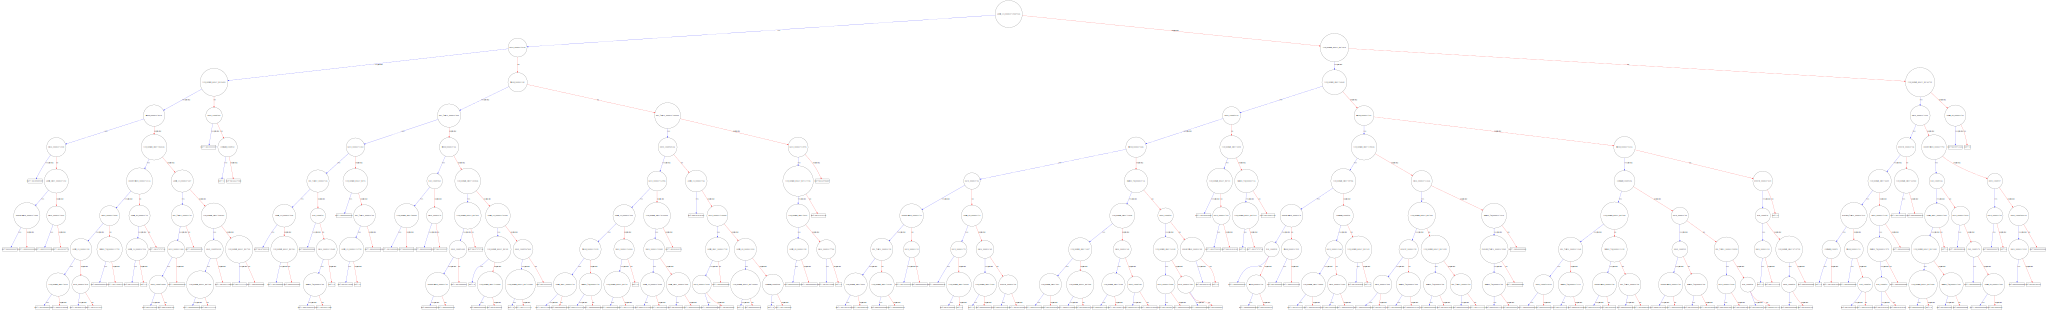

In [23]:
xgb.to_graphviz(xgbmodel2)


<function matplotlib.pyplot.show(*args, **kw)>

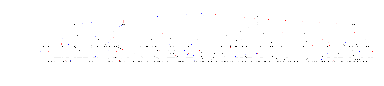

In [24]:
from xgboost import plot_tree
plot_tree(xgbmodel2, randir = 'LR')
plt.show

# Feature importance 
Examining feature importance to check important attributes.

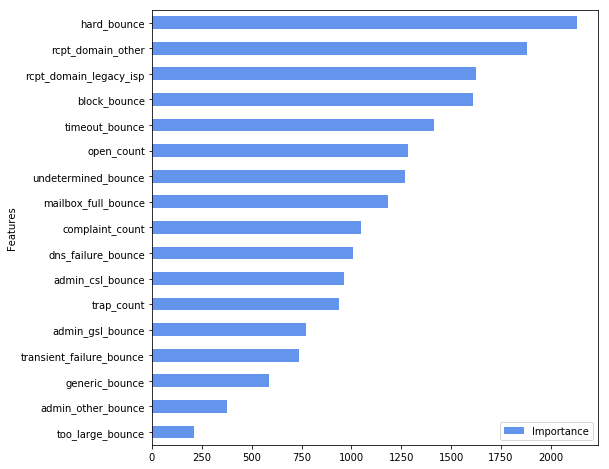

In [26]:
best_model = xgb.train(xgb2.get_xgb_params(), xgtrain, best_round)
importances = best_model.get_fscore()
imp_frame = pd.DataFrame({'Importance': list(importances.values()), 'Features': list(importances.keys())})
imp_frame.sort_values(by = 'Importance', inplace = True)
imp_frame.plot(kind = 'barh', x = 'Features', figsize = (8,8), color = 'cornflowerblue')
plt.show()